<a href="https://colab.research.google.com/github/prithiba-A/Mini-Project-45-Try_using_a_pre-trained_model-Besides-ResNet-on_Animal_Images_Dataset/blob/main/Mini_Project_45_Try_using_a_pre_trained_model_(Besides_ResNet)_on_Animal_Images_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# path to images
path = '/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/'

# animal categories
categories = ['dogs', 'panda', 'cats']


Using TensorFlow backend.


<h1>1. Display some pictures</h1>

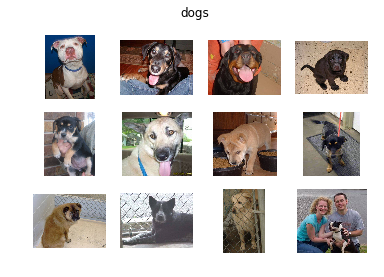

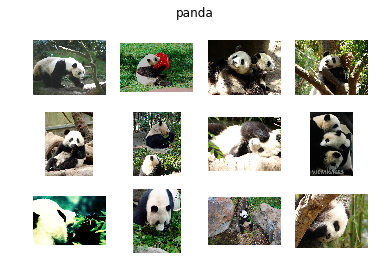

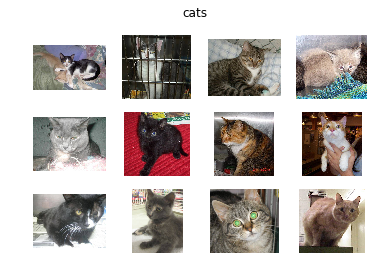

In [ ]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

<h1>2. Pictures shape</h1>

In [ ]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []


dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


Since images have different shapes, let's resize pictures to height = 32 and width = 55.

<h1>3. Preprocess data and label inputs</h1>

In [ ]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)



[['/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/panda/panda_00175.jpg', 1], ['/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/panda/panda_00590.jpg', 1], ['/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/cats/cats_00474.jpg', 2], ['/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/dogs/dogs_00966.jpg', 0], ['/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/dogs/dogs_00303.jpg', 0], ['/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/panda/panda_00109.jpg', 1], ['/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/dogs/dogs_00115.jpg', 0], ['/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/panda/panda_00986.jpg', 1], ['/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/cats/cats_00460.jpg', 2], ['/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/panda/panda_00967.jpg', 1]]


In [ ]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

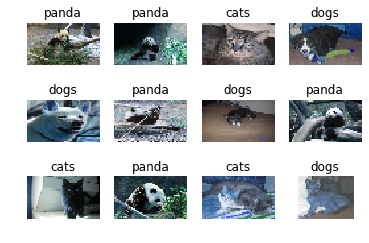

In [ ]:
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

<h1>4. Split dataset into train and test set</h1>

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
# Preprocess class labels
trainY = np_utils.to_categorical(trainY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400, 3)
(600,)


<h1>5. Define model architecture</h1>

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 54, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 27, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 26, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 13, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 13, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2912)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

<h1>6. Fit model on training data</h1>

In [ ]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
2400/2400 [==============================] - 3s 1ms/step - loss: 0.9290 - accuracy: 0.5150
Epoch 2/25
2400/2400 [==============================] - 2s 840us/step - loss: 0.7597 - accuracy: 0.6221
Epoch 3/25
2400/2400 [==============================] - 2s 840us/step - loss: 0.6807 - accuracy: 0.6542
Epoch 4/25
2400/2400 [==============================] - 2s 849us/step - loss: 0.6388 - accuracy: 0.6988
Epoch 5/25
2400/2400 [==============================] - 2s 865us/step - loss: 0.5904 - accuracy: 0.7188
Epoch 6/25
2400/2400 [==============================] - 2s 851us/step - loss: 0.5635 - accuracy: 0.7258
Epoch 7/25
2400/2400 [==============================] - 2s 844us/step - loss: 0.5370 - accuracy: 0.7546
Epoch 8/25
2400/2400 [==============================] - 2s 844us/step - loss: 0.4851 - accuracy: 0.7721
Epoch 9/25
2400/2400 [==============================] - 2s 856us/step - loss: 0.4669 - accuracy: 0.7987
Epoch 10/25
2400/2400 [==============================] - 2s 843us/

<h1>7. Evaluate model on test data</h1>

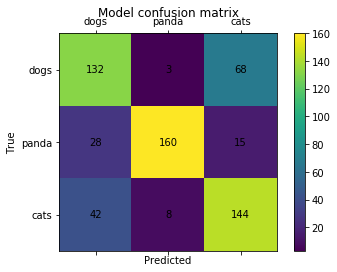

Accuracy : 72.67%


In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))